# 1 Installing the YOLOv8 Environment

To start off with YOLOv8 we first clone the YOLOv8 repository and install dependencies. This will set up our programming environment to be ready to running object detection training and inference commands.

In [1]:
# Clone repository
!git clone https://github.com/ultralytics/ultralytics

# Navigate to the cloned directory
%cd ultralytics

# Install the package in editable mode for development
!pip install -e .

C:\Users\CP1\Documents\GitHub\Itemized-Billing\ultralytics


fatal: destination path 'ultralytics' already exists and is not an empty directory.


Obtaining file:///C:/Users/CP1/Documents/GitHub/Itemized-Billing/ultralytics
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Attempting uninstall: ultralytics
    Found existing installation: ultralytics 8.0.165


ERROR: Cannot uninstall ultralytics 8.0.165, RECORD file not found. You might be able to recover from this via: 'pip install --force-reinstall --no-deps ultralytics==8.0.165'.


# 2 Import Libraries

In [2]:
import torch
print('torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))
from ultralytics import YOLO

import yaml
import glob
from IPython.display import Image, display
from IPython.core.magic import register_line_cell_magic

from DataAugmentation import DataAugmentation

torch 1.13.1+cu116 _CudaDeviceProperties(name='NVIDIA GeForce RTX 3090', major=8, minor=6, total_memory=24575MB, multi_processor_count=82)


In [3]:
%cd ..

# Open and read the YAML file
with open('configuration/config-TCD.yaml', 'r') as file:
    yaml_data = yaml.safe_load(file)

yaml_data

C:\Users\CP1\Documents\GitHub\Itemized-Billing


{'path': 'C:/Users/CP1/Documents/GitHub/Itemized-Billing/TCD-yolo-1.1',
 'train': 'train.txt',
 'val': 'valid.txt',
 'nc': 1,
 'names': ['Row']}

In [4]:
# Define number of classes based on YAML
with open('configuration/config-TCD.yaml', 'r') as stream:
    num_classes = str(yaml.safe_load(stream)['nc'])

print(f'Number of class: {num_classes}')

Number of class: 1


In [5]:
import os

current_directory = os.getcwd()
print("Current Directory:", current_directory)

Current Directory: C:\Users\CP1\Documents\GitHub\Itemized-Billing


# 3 Train YOLOv8

In [6]:
model = YOLO('yolov8s.pt')  # build a new model from scratch

results = model.train(data='configuration/config-TCD.yaml', epochs=1000, workers=1, imgsz=416)  # train the model

New https://pypi.org/project/ultralytics/8.0.199 available  Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.171  Python-3.10.10 torch-1.13.1+cu116 CUDA:0 (NVIDIA GeForce RTX 3090, 24576MiB)
WARNING  Upgrade to torch>=2.0.0 for deterministic training.
engine\trainer: task=detect, mode=train, model=yolov8s.pt, data=configuration/config-TCD.yaml, epochs=1000, patience=50, batch=16, imgsz=416, save=True, save_period=-1, cache=False, device=None, workers=1, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_st

# 4 Evaluate the model

In [7]:
results.results_dict

{'metrics/precision(B)': 0.9224882739588622,
 'metrics/recall(B)': 0.7173732335827099,
 'metrics/mAP50(B)': 0.8737598968489934,
 'metrics/mAP50-95(B)': 0.5132389224363647,
 'fitness': 0.5492910198776275}

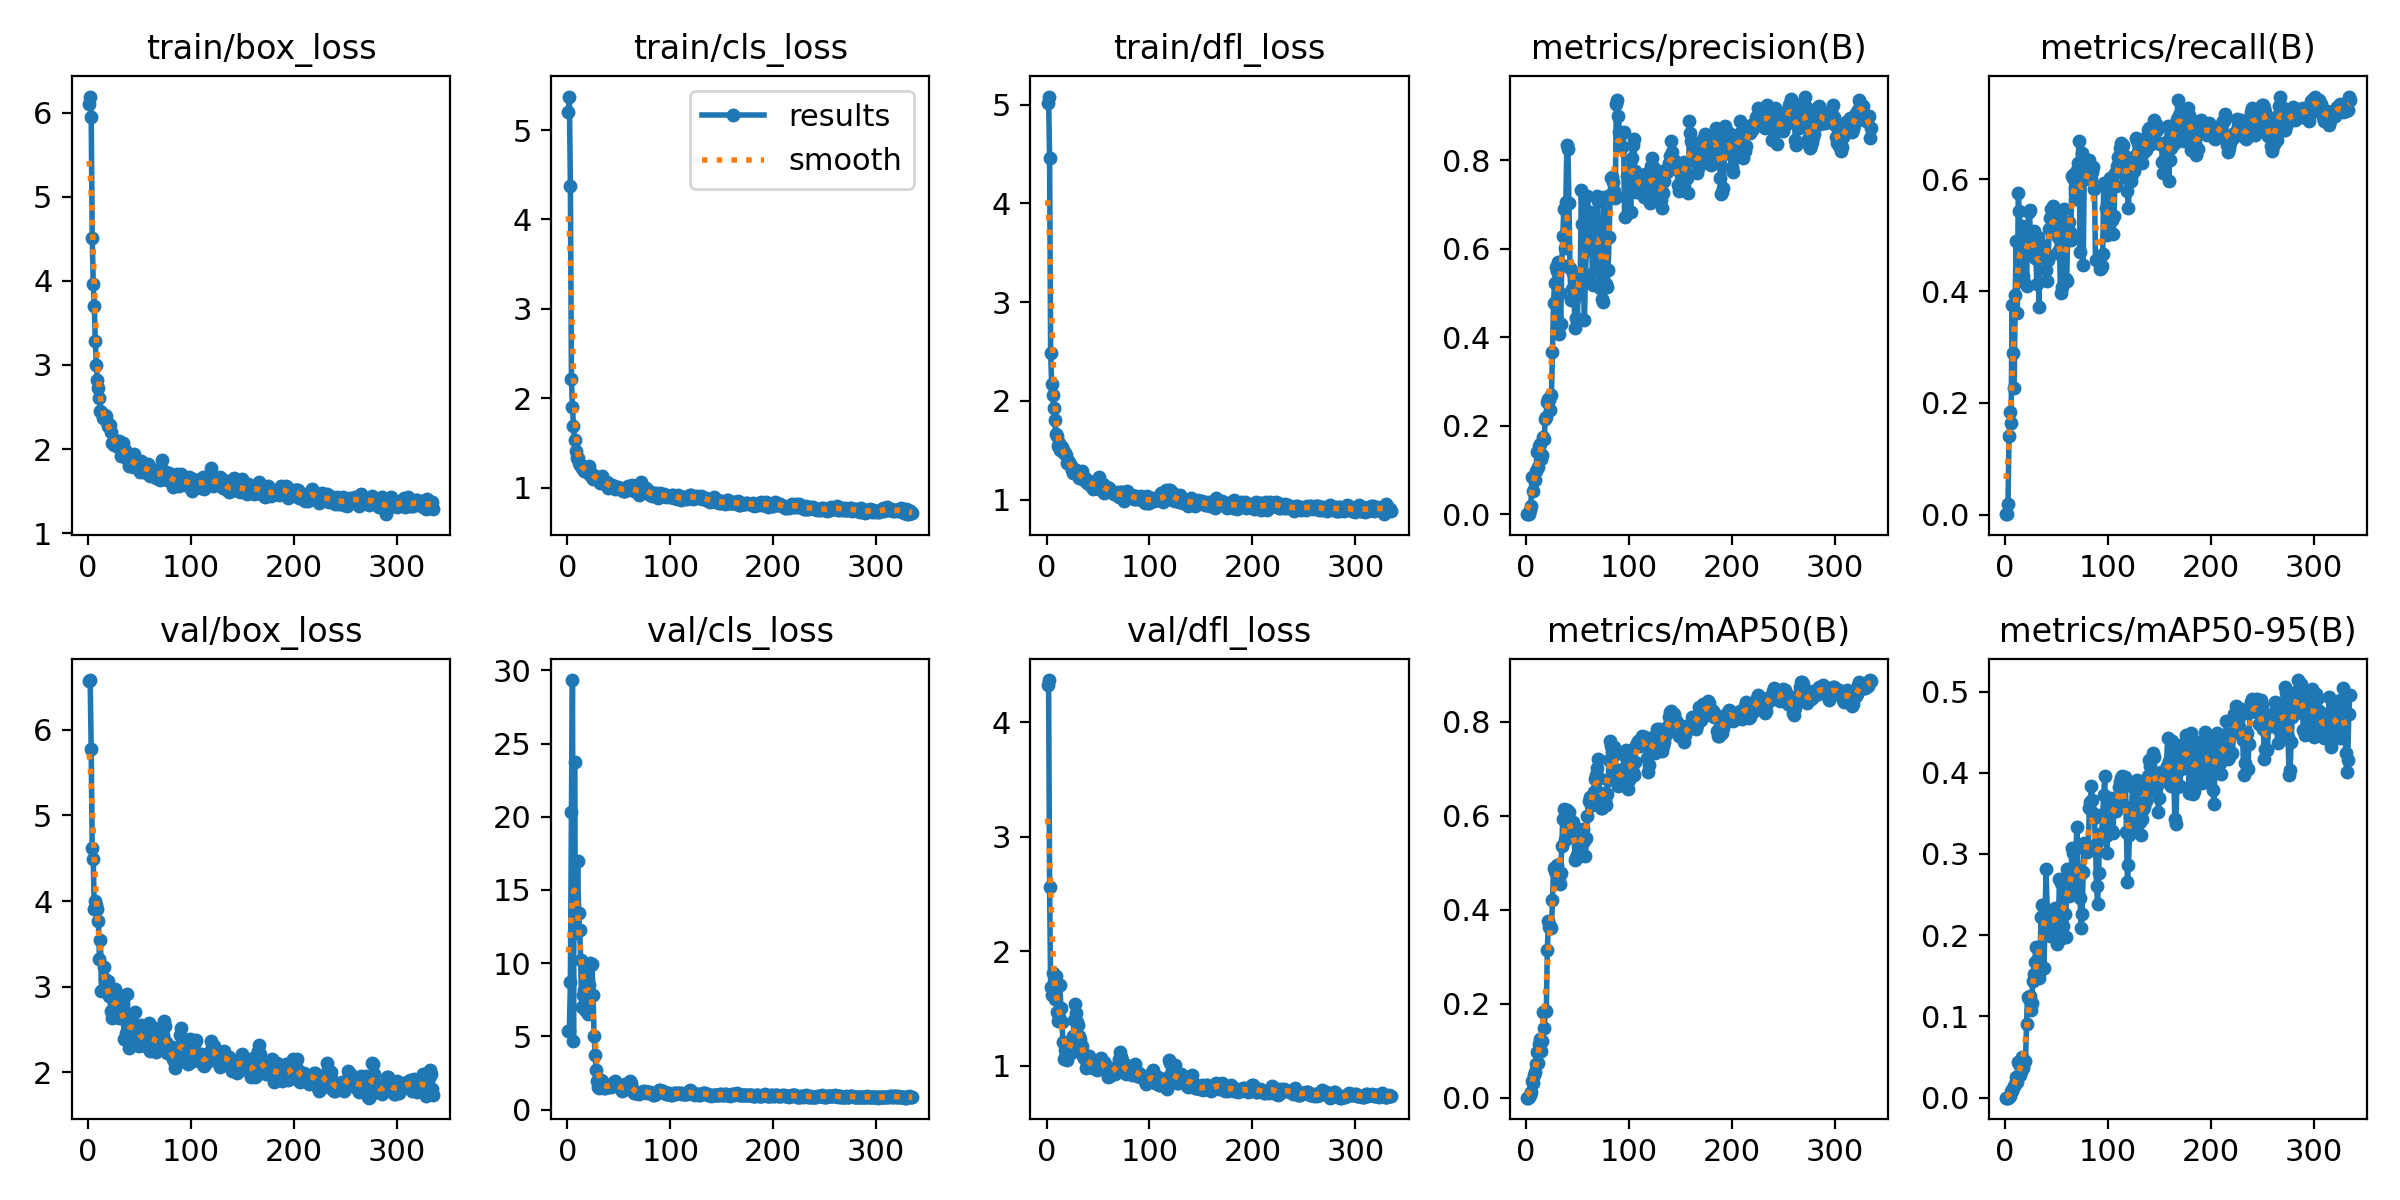

In [8]:
# We can also output some older school graphs if the tensor board isn't working for whatever reason...
Image(filename=f'{str(results.save_dir)}/results.png', width=1000)

## 4.1 Visualize the Training Data

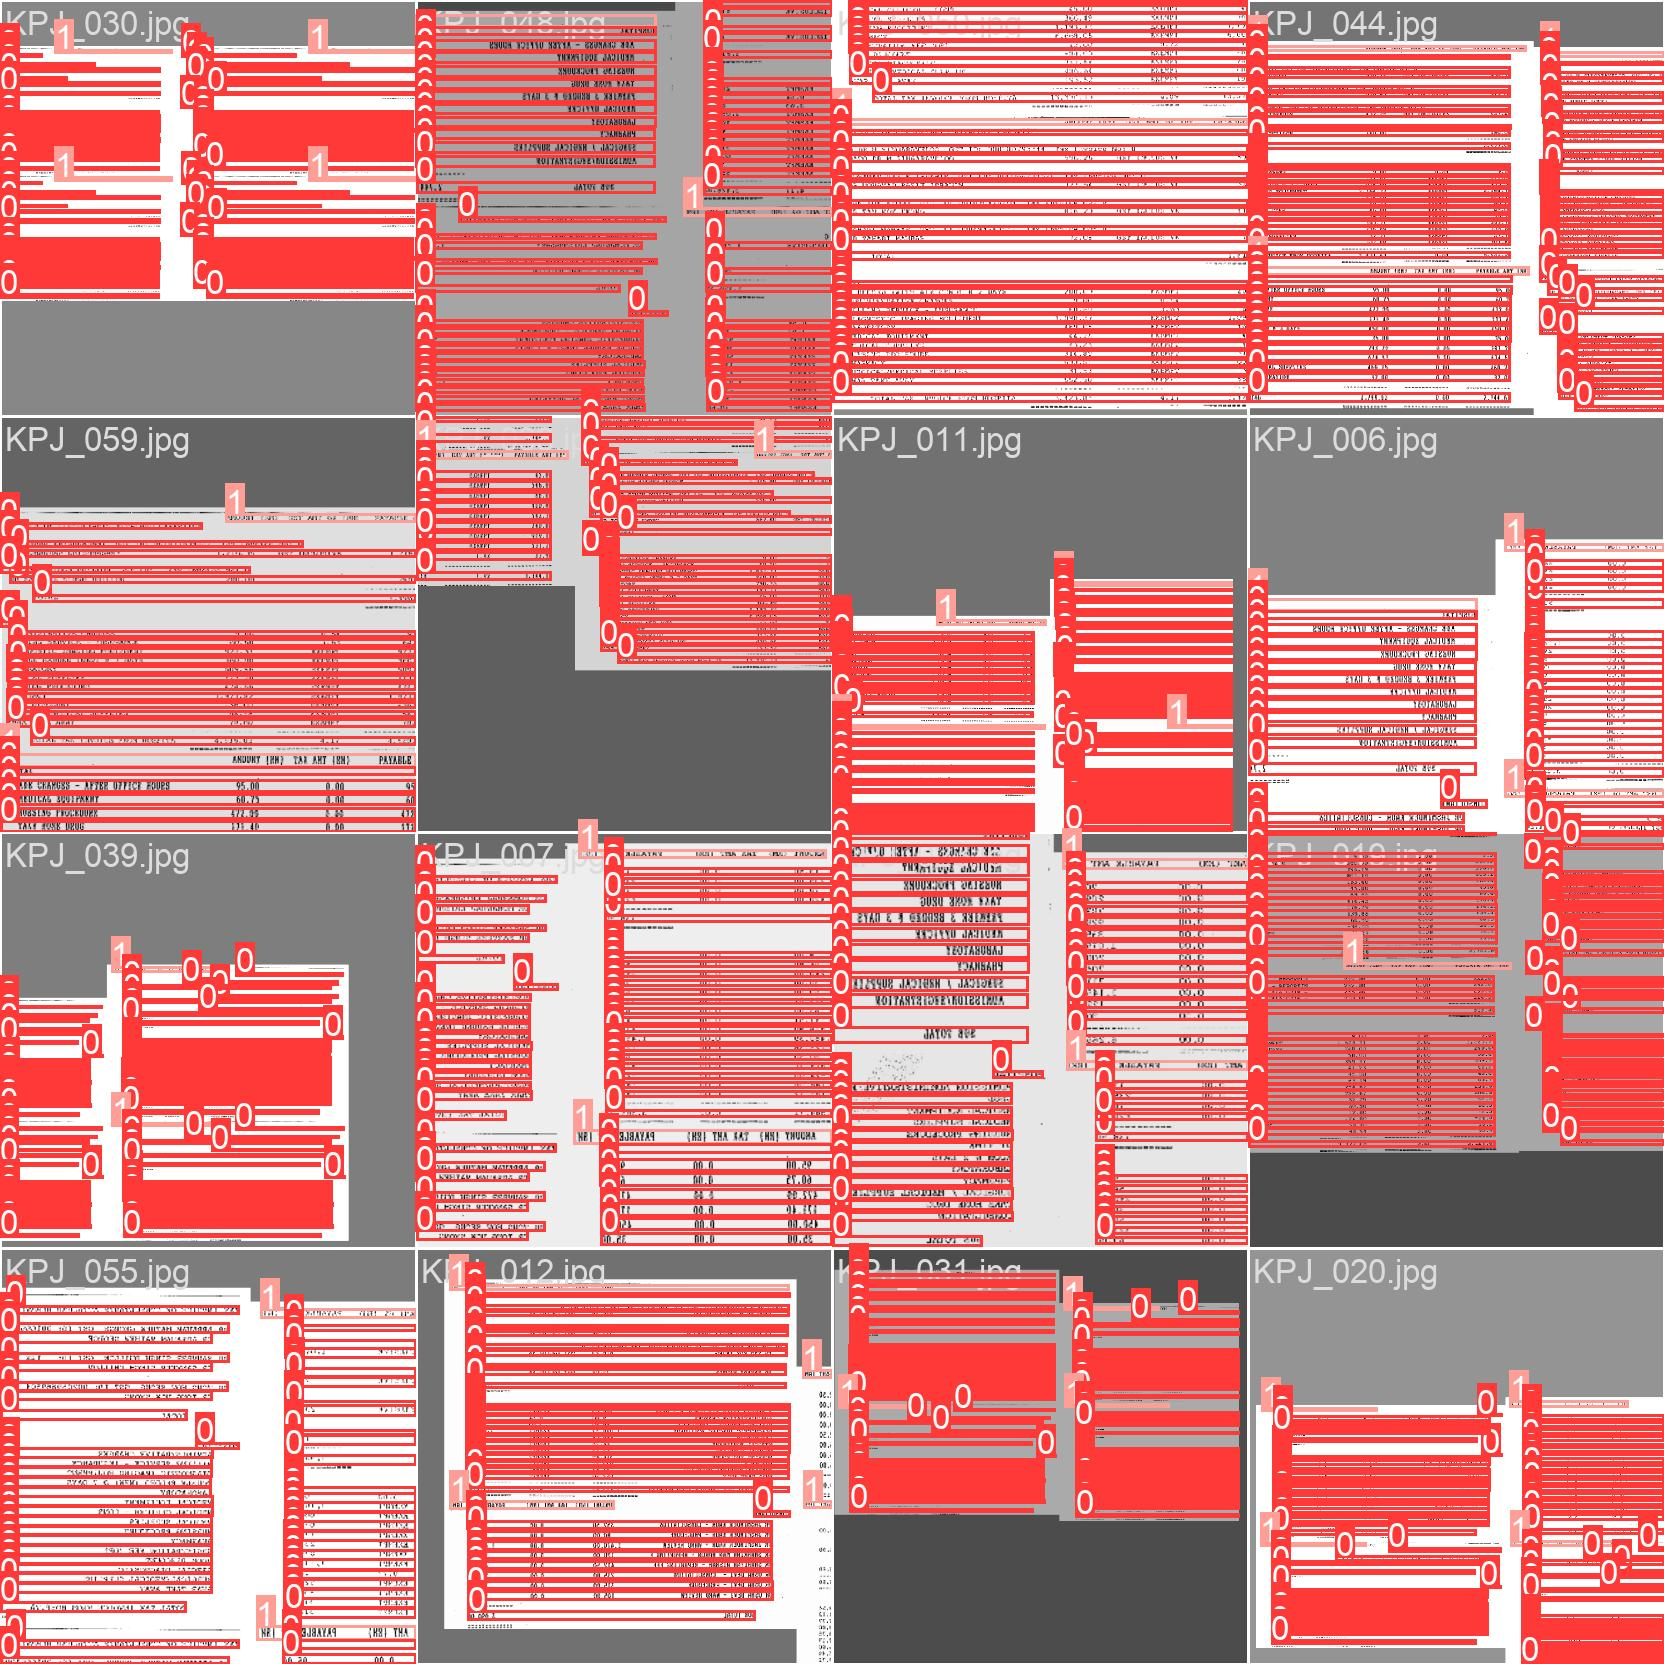

In [9]:
Image(filename=f'{str(results.save_dir)}/train_batch0.jpg', width=900)

## 4.2 Visualize the Labels of Validating Data

In [10]:
Image(filename=f'{str(results.save_dir)}/val_batch0_labels.jpg', width=900)

FileNotFoundError: [Errno 2] No such file or directory: 'runs\\detect\\train3/val_batch0_labels.jpg'

## 4.3 Visualize the Predicted Testing Data

In [ ]:
Image(filename=f'{str(results.save_dir)}/val_batch0_pred.jpg', width=900)

# 5 Run Inference  With Trained Weights
Run inference with a pretrained checkpoint on contents of `test/images` folder downloaded from Roboflow.


In [11]:
source = 'Crop_Images'
model = YOLO(f'{str(results.save_dir)}/weights/best.pt')
# model = YOLO('best.pt')

deskewer = DataAugmentation(source)
deskewer.processor()

prediction = model.predict(source=source, save=True, imgsz=416)

1. Crop_Images\KPJ_001.png
2. Crop_Images\KPJ_002.png
3. Crop_Images\KPJ_003.png
4. Crop_Images\KPJ_004.png
5. Crop_Images\KPJ_005.png
6. Crop_Images\KPJ_006.png
7. Crop_Images\KPJ_007.png
8. Crop_Images\KPJ_008.png
9. Crop_Images\KPJ_009.png
10. Crop_Images\KPJ_011.png
11. Crop_Images\KPJ_012.png
12. Crop_Images\KPJ_013.png
13. Crop_Images\KPJ_014.png
14. Crop_Images\KPJ_015.png
15. Crop_Images\KPJ_016.png
16. Crop_Images\KPJ_017.png
17. Crop_Images\KPJ_018.png
18. Crop_Images\KPJ_019.png
19. Crop_Images\KPJ_020.png
20. Crop_Images\KPJ_021.png
21. Crop_Images\KPJ_022.png
22. Crop_Images\KPJ_080.png
23. Crop_Images\KPJ_088.png
24. Crop_Images\KPJ_096.png
25. Crop_Images\KPJ_097.png
26. Crop_Images\KPJ_098.png
27. Crop_Images\KPJ_099.png
28. Crop_Images\KPJ_100.png
29. Crop_Images\KPJ_101.png
30. Crop_Images\KPJ_102.png
31. Crop_Images\KPJ_103.png
32. Crop_Images\KPJ_104.png
33. Crop_Images\KPJ_105.png
34. Crop_Images\KPJ_106.png
35. Crop_Images\KPJ_107.png
36. Crop_Images\KPJ_108.png
3


image 1/57 C:\Users\CP1\Documents\GitHub\Itemized-Billing\Crop_Images\KPJ_001.png: 288x416 43 Rows, 31.3ms
image 2/57 C:\Users\CP1\Documents\GitHub\Itemized-Billing\Crop_Images\KPJ_002.png: 224x416 33 Rows, 31.2ms
image 3/57 C:\Users\CP1\Documents\GitHub\Itemized-Billing\Crop_Images\KPJ_003.png: 224x416 43 Rows, 31.2ms
image 4/57 C:\Users\CP1\Documents\GitHub\Itemized-Billing\Crop_Images\KPJ_004.png: 224x416 35 Rows, 31.7ms
image 5/57 C:\Users\CP1\Documents\GitHub\Itemized-Billing\Crop_Images\KPJ_005.png: 320x416 19 Rows, 31.2ms
image 6/57 C:\Users\CP1\Documents\GitHub\Itemized-Billing\Crop_Images\KPJ_006.png: 224x416 44 Rows, 31.6ms
image 7/57 C:\Users\CP1\Documents\GitHub\Itemized-Billing\Crop_Images\KPJ_007.png: 224x416 36 Rows, 31.2ms
image 8/57 C:\Users\CP1\Documents\GitHub\Itemized-Billing\Crop_Images\KPJ_008.png: 224x416 30 Rows, 31.2ms
image 9/57 C:\Users\CP1\Documents\GitHub\Itemized-Billing\Crop_Images\KPJ_009.png: 192x416 10 Rows, 31.2ms
image 10/57 C:\Users\CP1\Documents\G